# Overfitting Problem 실습

이번 실습에서는 **Overfitting 문제**를 체감해봅니다.
- 작은 데이터셋을 사용
- 단순한 모델 vs 복잡한 모델 비교
- 학습 곡선(Train vs Validation Loss/Accuracy) 시각화

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. 데이터 준비 (작은 데이터셋)

In [7]:
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. 단순한 모델과 복잡한 모델 정의

In [8]:
def build_simple_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(2,)),
        tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

def build_complex_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(2,)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

## 3. 모델 학습 (Simple vs Complex)

In [9]:
simple_model = build_simple_model()
complex_model = build_complex_model()

history_simple = simple_model.fit(
    X_train, y_train, validation_data=(X_test, y_test),
    epochs=100, batch_size=16, verbose=0
)

history_complex = complex_model.fit(
    X_train, y_train, validation_data=(X_test, y_test),
    epochs=100, batch_size=16, verbose=0
)

## 4. 학습 곡선 시각화 (Overfitting 확인)

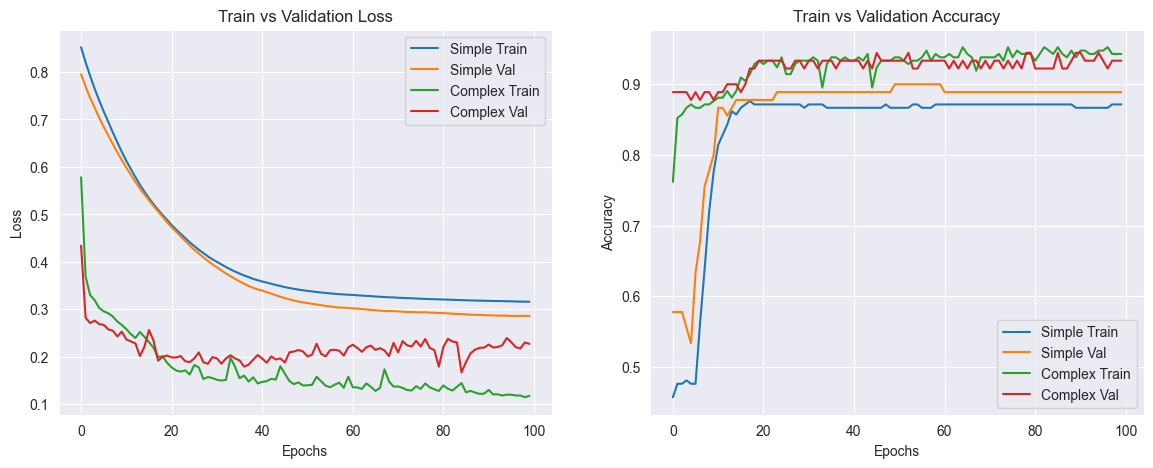

In [10]:
plt.figure(figsize=(14,5))

# Loss 비교
plt.subplot(1,2,1)
plt.plot(history_simple.history["loss"], label="Simple Train")
plt.plot(history_simple.history["val_loss"], label="Simple Val")
plt.plot(history_complex.history["loss"], label="Complex Train")
plt.plot(history_complex.history["val_loss"], label="Complex Val")
plt.title("Train vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy 비교
plt.subplot(1,2,2)
plt.plot(history_simple.history["accuracy"], label="Simple Train")
plt.plot(history_simple.history["val_accuracy"], label="Simple Val")
plt.plot(history_complex.history["accuracy"], label="Complex Train")
plt.plot(history_complex.history["val_accuracy"], label="Complex Val")
plt.title("Train vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

### 5. 생각해보기
- 간단한 모델은 Overfitting이 발생했는가?
- 복잡한 모델은 Overfitting이 발생했는가?